# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


<h4>Imports</h4>

In [1]:
from faker import Faker
import random
import pandas as pd
import seaborn as sns

<h4>Fake Data Creation</h4>

In [2]:
# eastern states list
eastern_states = ['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 
                  'Delaware', 'Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']
# departments list
departments = ['Accounts and Finance', 'HR', 'Sales and marketing', 'Infrastructures', 'Research and development', 
               'Learning and development','IT services', 'Product development', 'Admin department', 'Security and transport']
number_of_records = random.randint(10000, 11000)

# setting locale of faker to United States
fake_data = Faker(locale='en_US')

# creating employees list using faker module and random
fake_employees = [
    {
        'emp_id': 10001+x,
        'emp_name': fake_data.first_name(),
        'emp_lastname': fake_data.last_name(),
        'emp_phone': fake_data.phone_number(),
        'emp_state':fake_data.random_element(elements=eastern_states)
    }
    for x in range(number_of_records)]

# creating employee salary data using faker and random modules
fake_employees_salary = [
    {
        'emp_id': 10001+x,
        'department_id': random.randint(101, 111),
        'salary': random.randint(100000, 250000)
    }
    for x in range(number_of_records)]

# creating departments list
fake_department=[
    {
        'department_id':101 + x,
        'department_name': departments[x]
    } 
    for x in range(len(departments))]

In [3]:
# Creating respective dataframes for employees, salaries and departments
emp_df = pd.DataFrame(fake_employees)
salary_df = pd.DataFrame(fake_employees_salary)
department_df = pd.DataFrame(fake_department)

In [4]:
emp_sal = pd.merge(emp_df, salary_df, left_on="emp_id", right_on="emp_id")
emp_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10566 entries, 0 to 10565
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   emp_id         10566 non-null  int64 
 1   emp_name       10566 non-null  object
 2   emp_lastname   10566 non-null  object
 3   emp_phone      10566 non-null  object
 4   emp_state      10566 non-null  object
 5   department_id  10566 non-null  int64 
 6   salary         10566 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 660.4+ KB


In [5]:
employee_df = pd.merge(emp_sal, department_df, left_on="department_id", right_on="department_id")

<h4>Sanity Checks</h4>

In [6]:
employee_df['emp_id'].duplicated().any()

False

In [7]:
employee_df.head(10)

,emp_id,emp_name,emp_lastname,emp_phone,emp_state,department_id,salary,department_name
0,10001,Kimberly,Lamb,(266)705-9410,Massachusetts,106,140719,Learning and development
1,10009,Natalie,Jones,001-779-369-6097,Massachusetts,106,134689,Learning and development
2,10014,Jermaine,Anderson,+1-287-226-1922x994,Georgia,106,172396,Learning and development
3,10020,Cameron,Allen,705-306-5560x01008,Delaware,106,236529,Learning and development
4,10027,Samuel,Young,8681112433,Delaware,106,233344,Learning and development
5,10029,Lori,Arnold,+1-020-854-2881x1380,Delaware,106,225186,Learning and development
6,10039,Shawn,Duke,962.696.6004x5544,Virginia,106,199635,Learning and development
7,10049,Michael,Williams,782.787.4412x404,Maryland,106,124470,Learning and development
8,10053,Raymond,Harris,001-576-296-0049x823,Delaware,106,170331,Learning and development
9,10064,Kristin,Serrano,137-605-8333x864,New Hampshire,106,133515,Learning and development


In [8]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9556 entries, 0 to 9555
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   emp_id           9556 non-null   int64 
 1   emp_name         9556 non-null   object
 2   emp_lastname     9556 non-null   object
 3   emp_phone        9556 non-null   object
 4   emp_state        9556 non-null   object
 5   department_id    9556 non-null   int64 
 6   salary           9556 non-null   int64 
 7   department_name  9556 non-null   object
dtypes: int64(3), object(5)
memory usage: 671.9+ KB


<h4>Visualizations</h4>

<h5>Visualize the average salary of each department</h5>

<AxesSubplot:title={'center':'Average salary in each department'}, xlabel='department_name', ylabel='average salary'>

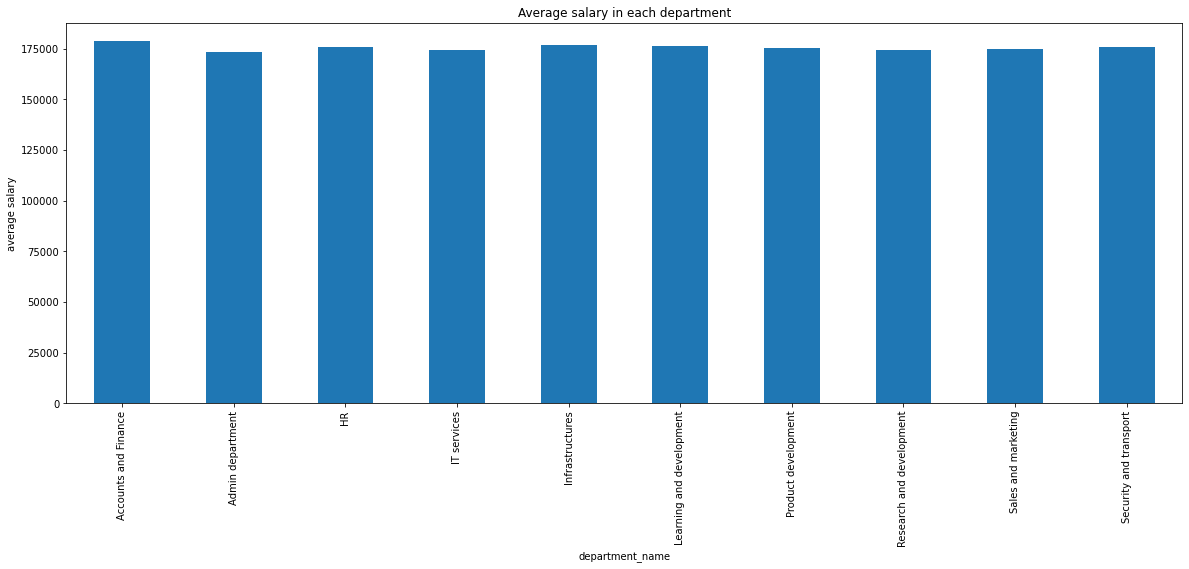

In [9]:
employee_df.groupby('department_name').salary.mean().plot.bar(figsize=(20, 7), title="Average salary in each department", ylabel="average salary")

<h5>Visualize the total number of employees living in each state for each department</h5>

<AxesSubplot:title={'center':'employee living in each state'}, xlabel='emp_state', ylabel='employee count'>

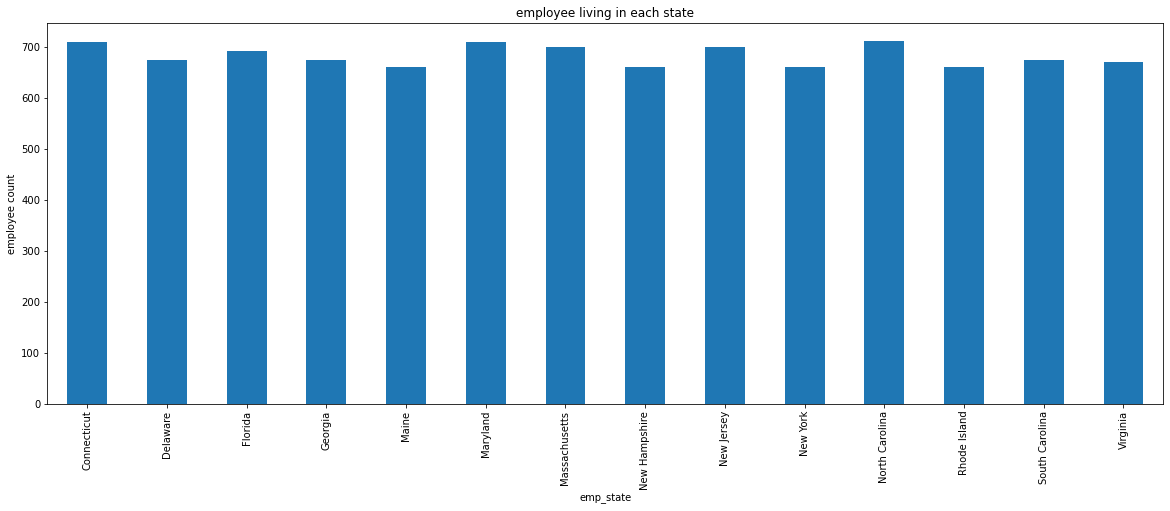

In [10]:
employee_df.groupby('emp_state').emp_state.count().plot.bar(figsize=(20, 7), title="employee living in each state", ylabel="employee count")

<h5>Visualize salary distribution of different states</h5>

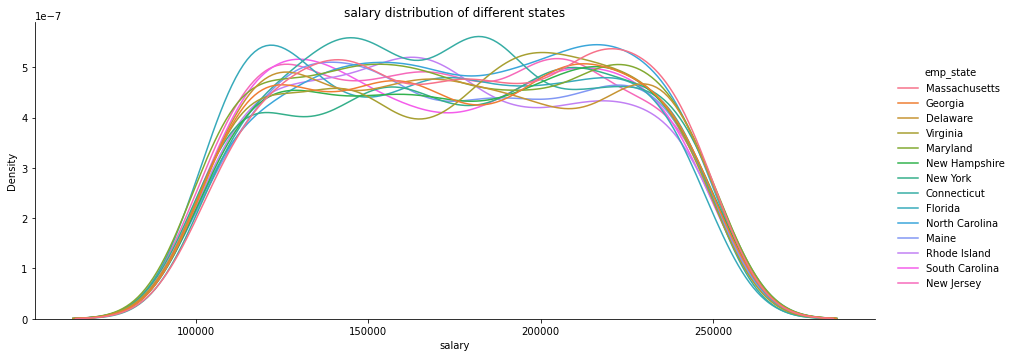

In [11]:
plot=sns.displot(employee_df, x="salary", kind="kde", hue='emp_state', aspect=2.5)
plot.set(title="salary distribution of different states")

<h5>Visualize salary distribution of different departments</h5>

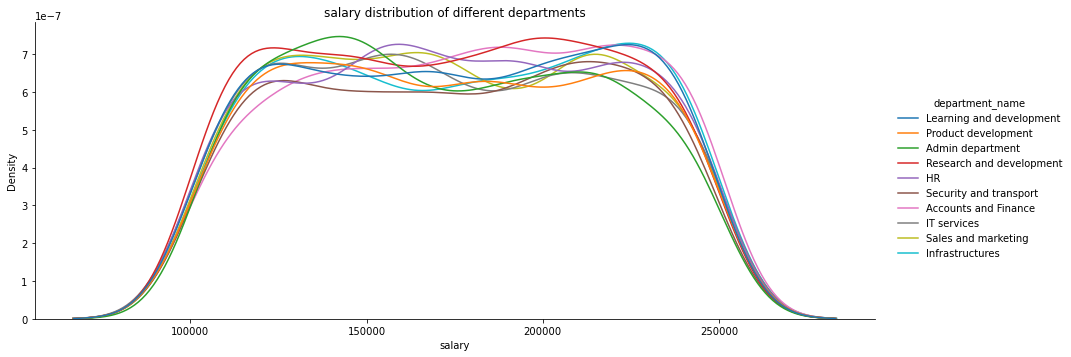

In [12]:
plot = sns.displot(employee_df, x="salary", kind="kde", hue='department_name', aspect=2.5)
plot.set(title="salary distribution of different departments")